<p style="margin: 15px;">


<ul>
<li>Выбрать входные и выходные переменные.</li>
<li>Выполнить настройку параметров лингвистических переменных: определить
количество термов, типов и параметров функций принадлежности</li>
<li>Сформировать базу нечетких правил.</li>
<li>Выполнить оценку качества полученной нечеткой системы</li>
</ul>
</p>


In [1]:
import pandas as pd
import skfuzzy.control as control
import skfuzzy as fuzzy
import numpy as np


# считаем данные и поределим входные и выходные переменные
data = pd.read_csv("./csv/option4.csv")

<p style="margin: 15px;">
Так как мы предсказываем инсульт, то входными переменными будут самые, пожалуй, важные критерии - возраст, уровень сахара в крови, ИМТ, гипертония (ее наличие/отсутствие) и сердечный приступ (тоже его наличие/отсутствие)<br><br>а вот ВЫходной переменной будет, естесственно, сам инсульт (наличие/отсутствие)
</p>


In [2]:
age = control.Antecedent(np.arange(0, 101, 1), 'age') # возраст от 0 до 100 с шагом 1 год и т.д.
glucose = control.Antecedent(np.arange(50, 301, 1), 'glucose')
bmi = control.Antecedent(np.arange(10, 50, 0.1), 'bmi')
hypertension = control.Antecedent(np.arange(0, 2, 1), 'hypertension')
heart_disease = control.Antecedent(np.arange(0, 2, 1), 'heart_disease')

# а теперь выходная переменная (Consequent)
stroke_risk = control.Consequent(np.arange(0, 1.1, 0.1), 'stroke_risk')

<p style="margin: 15px; text-align: center;">
НАКОНЕЦ Я УСТАНОВИЛА ВСЕ ПАКЕТЫ етить его
</p>

<p style="margin: 15px;">
теперь самое время определить нечеткие переменные, которые сложатся... в лингвистические
</p>


d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_7\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


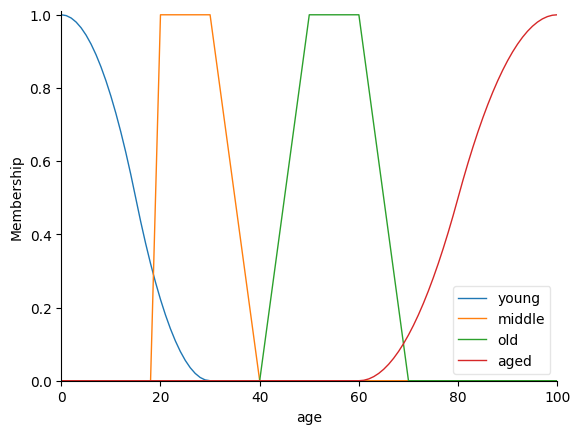

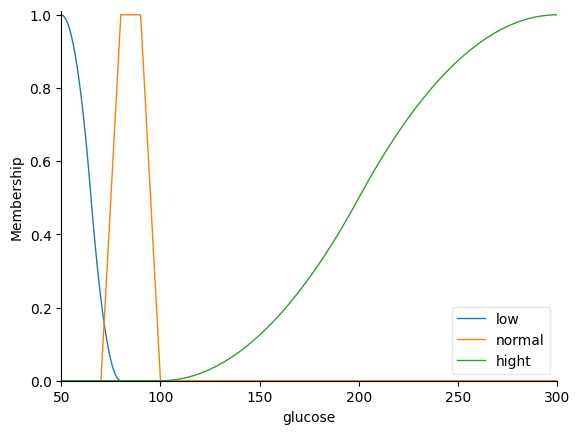

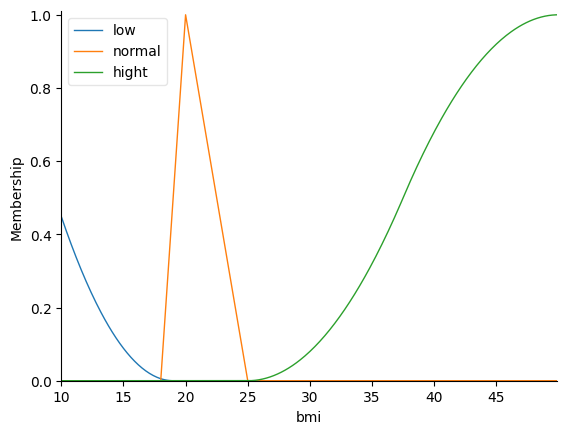

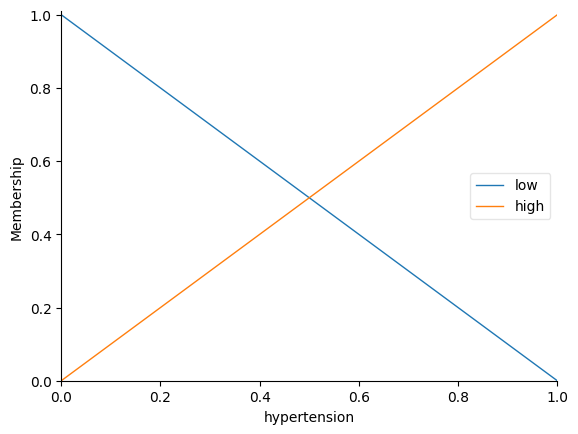

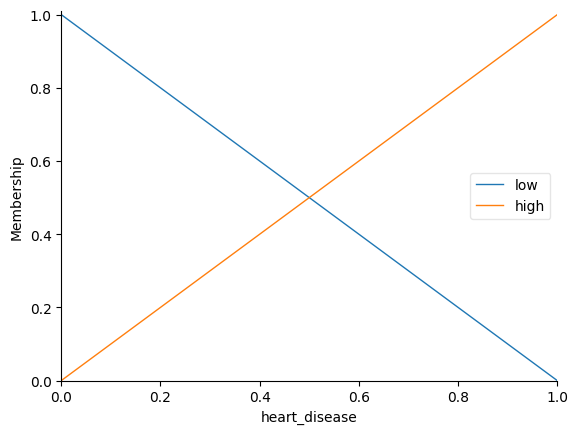

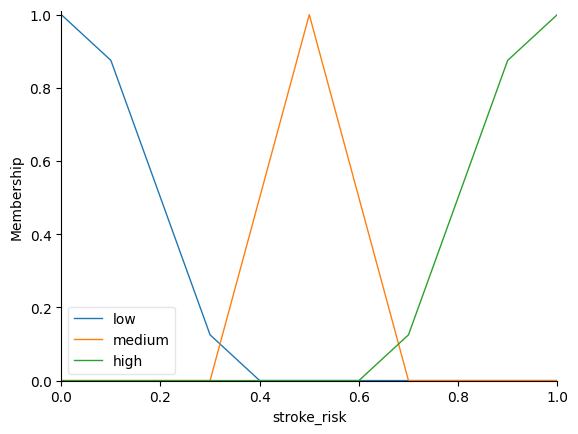

In [3]:
import matplotlib.pyplot as plt

# возраст
age['young'] = fuzzy.zmf(age.universe, 0, 30)
age['middle'] = fuzzy.trapmf(age.universe, [18, 20, 30, 40])
age['old'] = fuzzy.trapmf(age.universe, [40, 50, 60, 70])
age['aged'] = fuzzy.smf(age.universe, 60, 100)  

# сахар
glucose['low'] = fuzzy.zmf(glucose.universe, 50, 80)
glucose['normal'] = fuzzy.trapmf(glucose.universe, [70, 80, 90, 100])
glucose['hight'] = fuzzy.smf(glucose.universe, 100, 300)

# ИМТ
bmi['low'] = fuzzy.zmf(bmi.universe, 0, 19)
bmi['normal'] = fuzzy.trimf(bmi.universe, [18, 20, 25])
bmi['hight'] = fuzzy.smf(bmi.universe, 25, 50)

# гипертония
hypertension['low'] = fuzzy.zmf(hypertension.universe, 0, 0.6)
hypertension['high'] = fuzzy.smf(hypertension.universe, 0.4, 1.0)

# пердечный сриступ
heart_disease['low'] = fuzzy.zmf(heart_disease.universe, 0, 0.6)
heart_disease['high'] = fuzzy.smf(heart_disease.universe, 0.4, 1.0)

#риск инсульта
stroke_risk['low'] = fuzzy.zmf(stroke_risk.universe, 0, 0.4)
stroke_risk['medium'] = fuzzy.trimf(stroke_risk.universe, [0.3, 0.5, 0.7])
stroke_risk['high'] = fuzzy.smf(stroke_risk.universe, 0.6, 1.0)


age.view()
glucose.view()
bmi.view()
hypertension.view()
heart_disease.view()
stroke_risk.view()



<p style="margin: 15px;">
а теперь формируем базу нечетких правил :D
</p>


<style>
  .blur-text {
    filter: blur(3px);
    transition: filter 0.3s ease-in-out;
    cursor: pointer;
  }

  .blur-text.clear {
    filter: blur(0);
  }
</style>

<p class="blur-text" onclick="this.classList.toggle('clear')" style="margin: 15px;">
  ну.... с написанием правил мне чат гпт помог, я не медик, поэтому... спасибо чату
</p>

In [4]:
rule1 = control.Rule(age['aged'] & hypertension['high'], stroke_risk['high'])
rule2 = control.Rule(age['old'] & hypertension['high'], stroke_risk['high'])
rule3 = control.Rule(age['middle'] & hypertension['high'] & glucose['hight'], stroke_risk['high'])
rule4 = control.Rule(age['middle'] & hypertension['high'] & glucose['normal'], stroke_risk['medium'])
rule5 = control.Rule(age['young'] & hypertension['high'] & glucose['low'], stroke_risk['medium'])
rule6 = control.Rule(age['young'] & hypertension['low'] & glucose['normal'], stroke_risk['low'])
rule7 = control.Rule(age['aged'] & glucose['hight'] & bmi['hight'], stroke_risk['high'])
rule8 = control.Rule(age['old'] & glucose['normal'] & bmi['hight'], stroke_risk['medium'])
rule9 = control.Rule(age['old'] & glucose['low'] & bmi['low'], stroke_risk['low'])
rule10 = control.Rule(age['middle'] & bmi['hight'] & glucose['hight'], stroke_risk['high'])
rule11 = control.Rule(age['young'] & bmi['hight'] & glucose['hight'], stroke_risk['medium'])
rule12 = control.Rule(age['young'] & bmi['normal'] & glucose['normal'], stroke_risk['low'])
rule13 = control.Rule(age['aged'] & heart_disease['high'], stroke_risk['high'])
rule14 = control.Rule(age['old'] & heart_disease['high'], stroke_risk['high'])
rule15 = control.Rule(age['middle'] & heart_disease['high'], stroke_risk['medium'])
rule16 = control.Rule(age['young'] & heart_disease['high'], stroke_risk['medium'])
rule17 = control.Rule(age['aged'] & hypertension['high'] & glucose['hight'] & bmi['hight'], stroke_risk['high'])
rule18 = control.Rule(age['middle'] & hypertension['low'] & glucose['low'] & bmi['low'], stroke_risk['low'])
rule19 = control.Rule(heart_disease['high'] & glucose['hight'] & bmi['hight'], stroke_risk['high'])
rule20 = control.Rule(heart_disease['low'] & glucose['normal'] & bmi['normal'], stroke_risk['low'])


d:\code\mai\labs\AIM-PIbd-31-Bakalskaya-E-D\lab_7\.venv\Lib\site-packages\skfuzzy\control\controlsystem.py:135: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


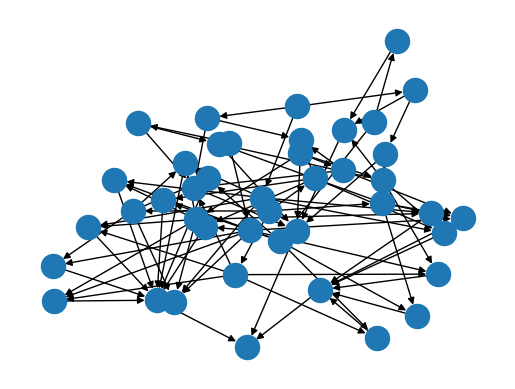

In [6]:
stroke_ctrl = control.ControlSystem([
    rule1, 
    rule2, 
    rule3,
    rule4,
    rule5,
    rule6,
    rule7,
    rule8,
    rule9,
    rule10,
    rule11,
    rule12,
    rule13,
    rule14,
    rule15,
    rule16,
    rule17,
    rule18,
    rule19,
    rule20,
])

stroke = control.ControlSystemSimulation(stroke_ctrl)
stroke_ctrl.view()